<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/18_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%A7%88%EC%9D%B4%EB%8B%9D__%EB%82%98%EC%9D%B4%EB%B8%8C%EB%B2%A0%EC%9D%B4%EC%8A%A4(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

# NLTK 자연어 처리 패키지

- Natural Language ToolKit 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지

**주요기능**
- 말뭉치(corpus): 자연어 분석을 위해 만든 샘플 문서의 집합을 뜻한다.
- 토큰 생성(Tokenizer): 긴 문자열을 분석을 위한 작은 단위로 나누는 것(문자열 단위 - 토큰)
- 형태소 분석(morpheme): 언어학에서는 일정한 의미가 있는 가장 작은 말의 단위
  - 어간 추출(stemming)
  - 원형 복원
- 품사 태깅(POS, part of speech)

In [ ]:
!pip install nltk

## 말뭉치(corpus)
- 자연어 분석 작업을 위해 만들어진 샘플 문서 집합

In [ ]:
import nltk
# quiet= True, 다운로드한 문서의 목록을 추출
nltk.download('book', quiet= True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
# 저작권이 만료된 문학작품을 포함한 말뭉치 gutenberg
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:1300])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 토큰 생성(tokenizer)
- 토큰(token)
- 정규표현식: 문장, 단어, 글자단위

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1300])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [ ]:
from nltk.tokenize import RegexpTokenizer
# pattern
# \w : 영문자, 숫자
pat = RegexpTokenizer('[\w]+')
pat.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석

- 형태소(morpheme): 일정한 의미가 있는 가장 작은 말의 단위
- 자연어 처리에서는 토큰으로 형태소를 이용
- 형태소 분석: 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어의 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 어간 추출 => 단어의 기본형
- 원형 복원 => 시제를 가지고 있는 단어의 어간을 찾아주는 작업
- 품사 부착 => 명사, 형용사, 동사...

In [ ]:
# 어간 추출: 단순히 어미만 제거할 뿐 단어의 원형을 정확히 찾아주지 못한다
from nltk.stem import PorterStemmer, LancasterStemmer

s1 = PorterStemmer()
s2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print('Poter: ', [s1.stem(w) for w in words])
print('Lancaster: ', [s2.stem(w) for w in words])

Poter:  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster:  ['fly', 'fli', 'fly', 'flew', 'flown']


In [ ]:
# 원형 복원: 같은 의미를 가진 여러 단어를 사전형으로 통일하는 작업
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
print([lm.lemmatize(w, pos='v') for w in words])

['fly', 'fly', 'fly', 'fly', 'fly']


## 품사 부착(POS)

- 품사: 단어의 문법적인 기능이나 형태, 뜻으로 구분하는 것
- NNP: 단수 고유명사
- VB: 동사
- VBP: 동사 현재형
- TO: 전치사
- NN: 명사(단수 or 복수형)
- DT: 관용사

In [ ]:
# pos_tag(): 단어 토큰에 품사를 부착하여 튜플로 추출
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to obtain the refuse permit'
tag_list = pos_tag(word_tokenize(sentence))
tag_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [ ]:
# 분석할 품사를 선택해서 해당 품사에 토큰만 추출
nouns_list = [t[0] for t in tag_list if t[1] == 'NN']
nouns_list

['refuse', 'permit']

In [ ]:
# untag(): 품사를 제거하고 추출
from nltk.tag import untag
untag(tag_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [ ]:
def tokenizer(doc):
    return ['/'. join(p) for p in tag_list]
# 함수 안에 doc 없어서 뭘 넣든 다 이 결과 나옴(함수 잘못만드심;)
tokenizer(sentence)



['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

# 나이브베이스

- 베이즈정리를 기반으로 한 통계적 분류 기법
- 가장 단순한 지도 학습 알고리즘
- 나이브 베이스 분류기는 빠르고 정확하며 믿을만한 알고리즘
- 정확도가 높고 대용량 데이터에 대해 속도가 빠르다
- 각 faeture끼리 서로 독립이라는 조건이 필요하다.

## 데이터 로딩

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 문제 정의: 스팸 여부 판단
- 문자 데이터셋을 이용하여 스팸 여부를 판단하는 문제
- 독립변수(text)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
data['target'].value_counts()

ham     4827
spam     747
Name: target, dtype: int64

- target의 편향이 굉장히 심한 데이터셋

## 전처리
- 특수문자 제거
- in: 문자 in 문자열
- not in: 문자 not in 문자열

In [ ]:
import string
# punctuation: 특수 문자 기호 목록
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
sample = data['text'].loc[0]
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
for i in sample:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [ ]:
for i in sample:
    if i not in string.punctuation:
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [ ]:
new_string = []
for i in sample:
    if i not in string.punctuation:
        new_string.append(i)

In [ ]:
new_string

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [ ]:
test = ['a', 'p', 'p', 'l', 'e']
test

['a', 'p', 'p', 'l', 'e']

In [ ]:
''.join(test)

'apple'

In [ ]:
new_string = []
for i in sample:
    if i not in string.punctuation:
        new_string.append(i)

new_string = ''.join(new_string)
new_string

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
# 특수기호를 제거한 후 문장을 되돌려주는 역할을 수행하는 함수를 구현

def remove_punc(x):
    new_string = []
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)

    new_string = ''.join(new_string)
    return new_string

In [ ]:
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
remove_punc(sample)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
data['text'] = data['text'].apply(remove_punc)
data['text']

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

## 전처리 - 불용어 제거
-  불용어(stopword): 자연어 분석에서 큰 의미가 없는 단어를 의미한다
- 불용어 사전


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
sample = data['text'].loc[0]
sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
# 작은 단위: 토큰, 단어단위
sample.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [ ]:
# lower(): 소문자로 변환
# upper(): 대문자로 변환
# capitalize(): 첫글자만 대문자로 변환

for w in sample.split():
    if w.lower() not in stopwords.words('english'):
        print(w)

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


In [ ]:
# 불용어를 제거하고 원래의 문장으로 되돌려주는 함수 구현
def stop_word(x):
    new_string = []
    for w in x.split():
        if w.lower() not in stopwords.words('english'):
            new_string.append(w.lower())

    # 단어 단위로
    new_string = ' '.join(new_string)
    return new_string

In [ ]:
data['text'] = data['text'].apply(stop_word)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## 전처리: target 값을 정형화처리

In [ ]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
sample = pd.Series(['a','b','c'])
sample

0    a
1    b
2    c
dtype: object

In [ ]:
sample.map({'a': 'apple', 'b': 'banana', 'c': 'candy'})

0     apple
1    banana
2     candy
dtype: object

In [ ]:
# spam = 1, ham = 0
data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

## 전처리 - text 피처 값을 벡터화로 변환
- 카운트 기반 벡터화: 문자를 개수 기반으로 벡터화하는 방식
- 데이터 전체에 존재하는 모든 문자를 사전처럼 모은 뒤에 고유 인덱스를 부여하고, 문자마다 속한 단어가 있는 인덱스를 카운트하는 방식

In [ ]:
x = data['text']
y = data['target']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# 지도학습: fit(), predict(), score()
# 비지도학습: fit(), transform(), fit_transform()

cv = CountVectorizer()
cv.fit(x)

# 문장 전체의 단어의 고유인덱스를 추출
cv.vocabulary_

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [ ]:
x = cv.transform(x)
print(x)

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [ ]:
data.loc[0]['text']

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
# 고유인덱스 추출
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3791
4687
6433


# 모델링

## 훈련세트와 테스트세트로 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size= 0.2, stratify= y, random_state= 100)

**사이킷런에서 제공하는 나이브베이스 모형**
- GaussianNB: 가우시안 정규분포 나이브베이스
- BernoulliNB: 베르누이분포 나이브베이스
- MultinomialNB: 다항분포 나이브베이스

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

pred = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 평가지표(실제값과 예측값)
accuracy_score(y_test, pred)

0.9748878923766816

In [ ]:
# 혼동 행렬
print(confusion_matrix(y_test, pred))

[[947  19]
 [  9 140]]


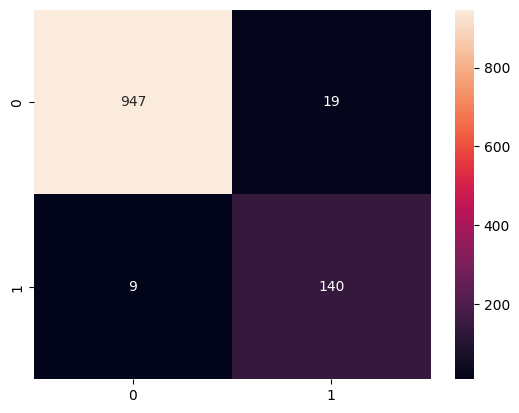

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')
plt.show()

- 실제값 ham(0), 예측값도 0인 경우는 947건(TN)
- 실제값 spam(1), 예측값도 1인경우는 140건(TP)
- 2종오류: 실제 1인데 0으로 예측한 경우 9건(FN)
- 1종오류: 실제 0인데 1로 예측한 경우 19건(FP)